# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.5 MB/s eta 0:00:00a 0:00:01
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


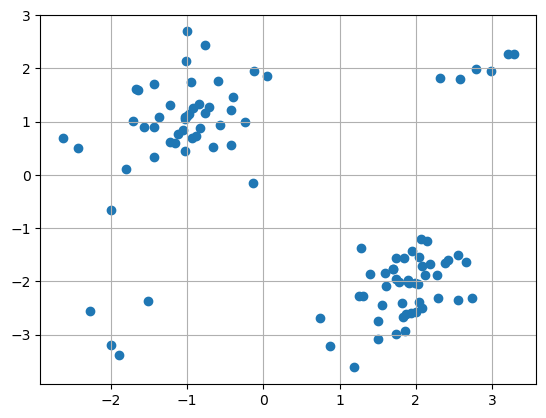

In [22]:
df = pd.read_excel('0.xls')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

43744.9720726905 -47901.12231008099


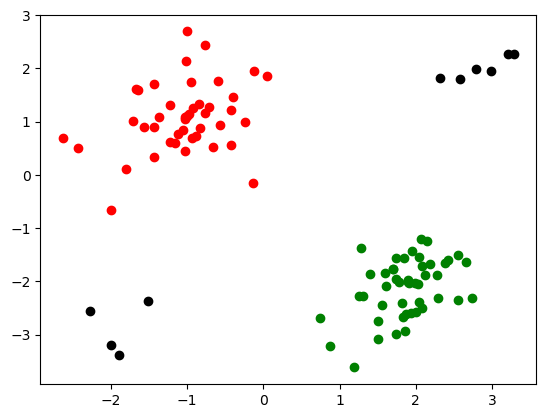

In [27]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and sqrt((x[j]-xx)**2+(yy-y[j])**2)<=1):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

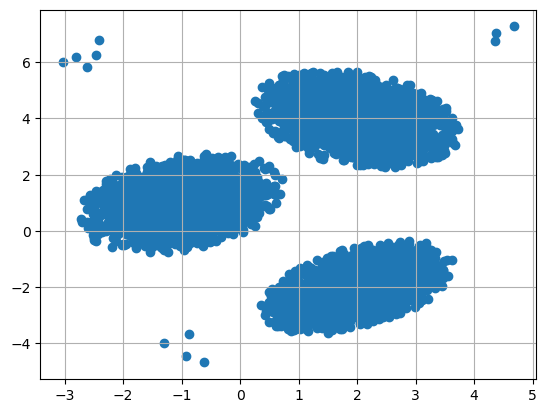

In [36]:
df = pd.read_excel('1.xls')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

99895.16126720734 100091.52172431567


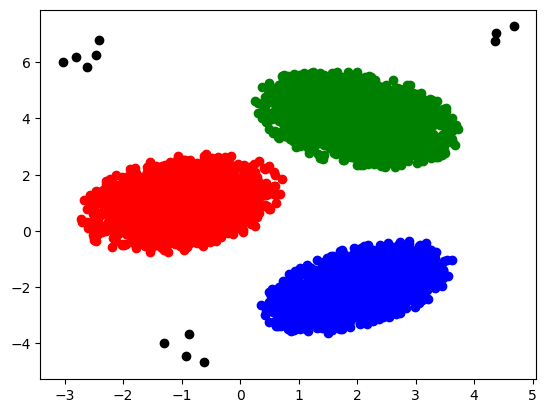

In [37]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and ((x[j]-xx)**2+(yy-y[j])**2)<=0.25):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

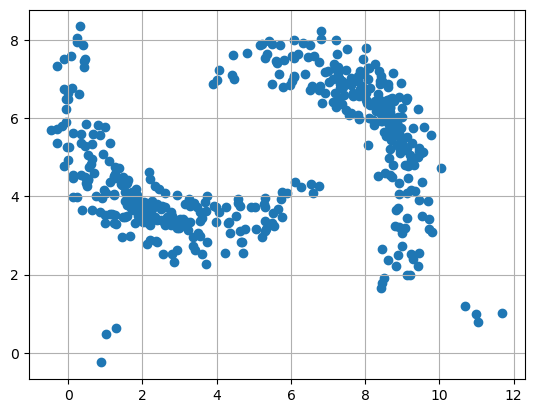

In [50]:
df = pd.read_excel('2.xlsx')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

515933.15322412294 498987.09548325336


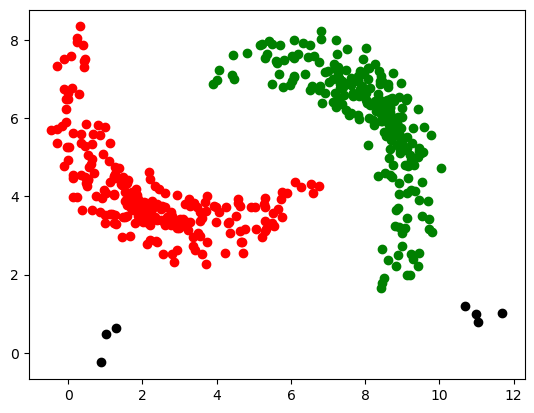

In [51]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and ((x[j]-xx)**2+(yy-y[j])**2)<=1):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

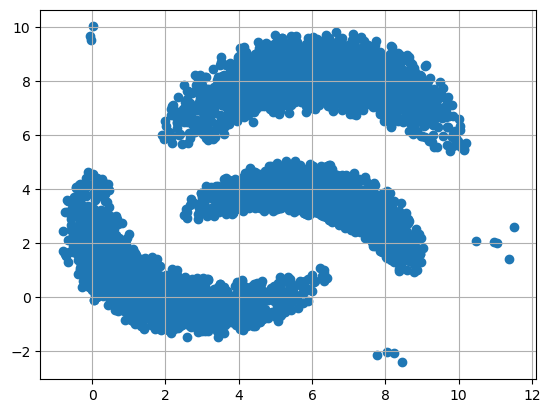

In [53]:
df = pd.read_excel('3.xlsx')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

471077.2743145155 409201.5147101898


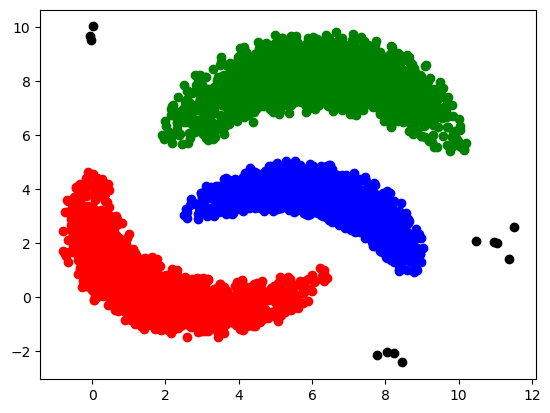

In [54]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and ((x[j]-xx)**2+(yy-y[j])**2)<=1):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

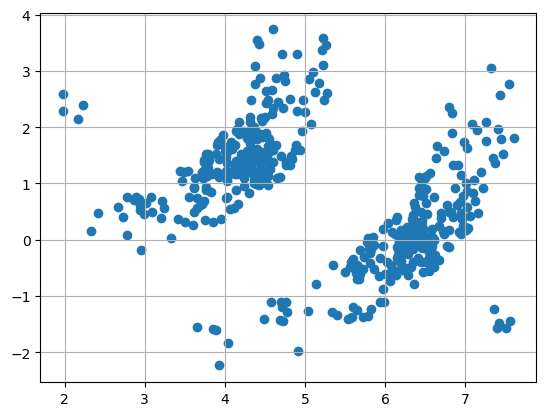

In [56]:
df = pd.read_excel('4.xlsx')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

528073.6080153874 71781.4560567934


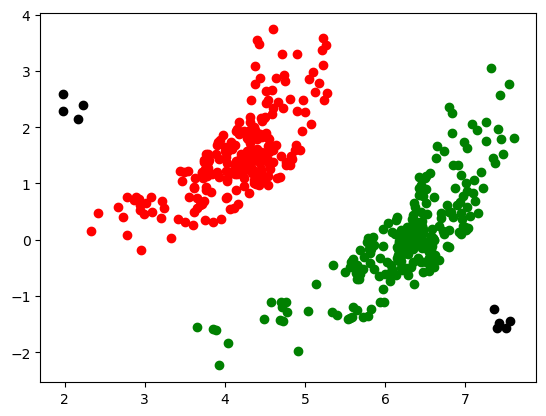

In [57]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and ((x[j]-xx)**2+(yy-y[j])**2)<=1):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

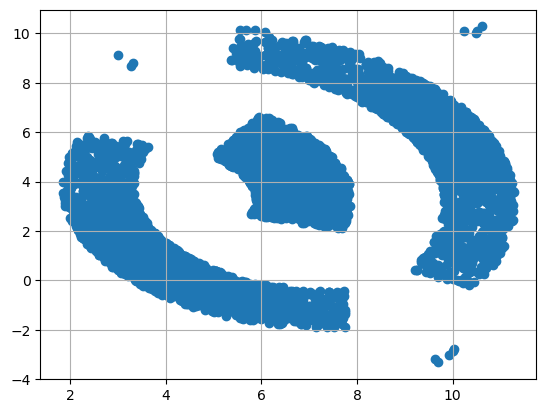

In [58]:
df = pd.read_excel('5.xlsx')
array = df.to_numpy()
x=[el[0] for el in array]
y=[el[1] for el in array]
plt.scatter(x, y)
plt.grid() 
plt.show()

669946.6490070053 370701.4765422125


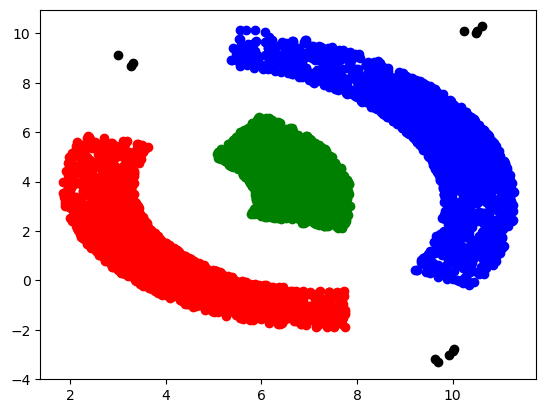

In [59]:
from math import sqrt
used=[0]*len(x)
lx=[]
ly=[]
for i in range(len(x)):
    xxx=1000000000000;
    yyy=1000000000000;
    lol=0
    for k in range(len(x)):
        if (used[k]==0):
            if (xxx>x[k]):
                xxx=x[k]
                yyy=y[k]
                lol=k
            elif (xxx==x[k] and yyy>y[k]):
                yyy=y[k]
                lol=k
    if (used[lol]==0):
        used[lol]=1;
        q=[]
        q.append([x[lol],y[lol]])
        sx=[]
        sy=[]
        cnt=1
        while (len(q)>0):
            xx,yy=q[0][0],q[0][1]
            sx.append(xx)
            sy.append(yy)
            q.pop(0)
            for j in range(len(x)):
                if (used[j]==0 and ((x[j]-xx)**2+(yy-y[j])**2)<=1):
                    q.append([x[j],y[j]])
                    used[j]=1
                    cnt+=1
        lx.append(sx)
        ly.append(sy)
ser=['red','green','blue','black','yellow','purple']
cnt=0
zen=[]
for i in range(len(lx)):
    if (len(lx[i])>29):
        sum=10000000000
        plt.scatter(lx[i],ly[i],color=ser[cnt])
        for j in range(len(lx[i])):
            sum2=0
            for k in range(len(lx[i])):
                if (k!=i):
                    sum2+=sqrt((lx[i][k]-lx[i][j])**2+(ly[i][k]-ly[i][j])**2)
            if (sum2<sum):
                sum=sum2
                besti=lx[i][j]
                bestj=ly[i][j]
        zen.append([besti,bestj])
        cnt+=1
    else:
        plt.scatter(lx[i],ly[i],color='black')
bestii=0
bestjj=0
for k in range(len(zen)):
    bestii+=zen[k][0]
    bestjj+=zen[k][1]
print(bestii*100000/len(zen),bestjj*100000/len(zen))

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =  
dbscan = 

clustering_algorithms = (
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("OPTICS", optics),
        ("Gaussian\nMixture", gmm),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()